Text(0.5, 1.0, '가나다')

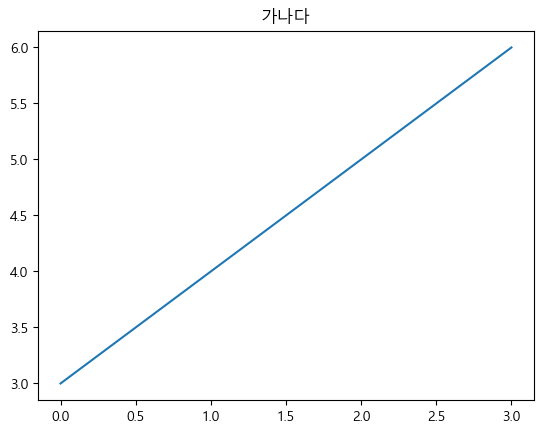

In [23]:
## 작업 1. 한글 사용할 수 있도록 차트 준비

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.plot([3,4,5,6])
plt.title('가나다')

In [ ]:
## 작업 2. 구글 검색 '한글 인코딩'

import sys
reload(sys)		# reload 해주지 않으면 setdefaultencoding() 호출 불가
sys.setdefaultencoding('utf-8')

# file = open('c:/', 'rt', encoding='utf-8')

In [3]:
## 작업 3. csv 자료 읽기 

import csv

data = []
f = open('./실습 및 미션 자료/울산광역시 남구_코로나19_확진자_및_사망자_현황_20220126.csv', 'r', encoding='euc-kr')
reader = csv.reader(f)

for row in reader:
    data.append(row)
f.close()

In [12]:
## 작업 4. 자료 분리

header = data[0] ; local=data[1:]
label = []

for x in local:
    label.append(x[2]+'-'+x[3])

num = []
for x in local:
    num.append(x[4:6])


In [13]:
## 작업 5. num의 확진자 수와 사망자 수가 문자로 되어 있어서 '8', '0' 이 자료를 8과0의 숫자로 변경해야 함.

### num에 있는 자료가 문자로 들어가 있음.
new_num = []

for x in num:           # 행 하나(리스트)마다
    line = []

    for y in x:
        line.append(int(y))     # 정수형으로 변환한걸 추가(리스트)
    new_num.append(line)        # 그렇게 된 리스트를 new_num에 추가

new_num

[[8, 0],
 [9, 1],
 [1, 0],
 [2, 0],
 [18, 0],
 [20, 0],
 [2, 0],
 [9, 0],
 [292, 22],
 [28, 8],
 [11, 1],
 [18, 0],
 [259, 0],
 [255, 1],
 [58, 0],
 [121, 0],
 [292, 0],
 [316, 5],
 [87, 0],
 [91, 1],
 [299, 1],
 [327, 2]]

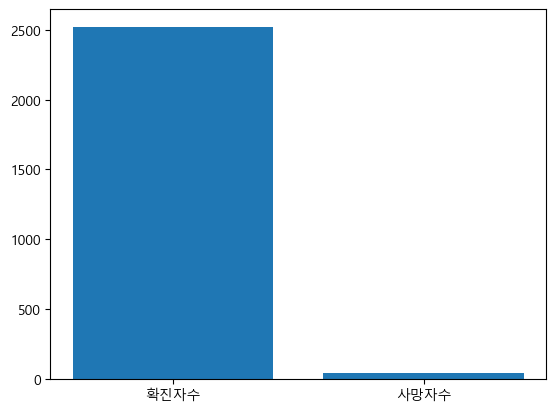

In [24]:
## 차트 작업에 필요한 숫자 계산 후 차트

'''세로합: ‘울산광역시-남구’에 대한 확진자수의 합
가로합(확진자수+사망자수)는 불필요함
단 2020년도 자료와 2021년도 자료를 분리해서 보고자 한다면
조건문을 배우지 않았음으로 사용자가 직접 분리를 해야함. 
'''

########## numpy로 합

import numpy as np

세로합 = np.sum(new_num, axis=0)    # axis=0은 행 축방향으로 동작(열 단위)
세로합

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

plt.bar(header[4:6], 세로합)
plt.show()

In [21]:
## 폰트 적용이 되지 않아 폰트 경로 까지 가서 설정..

# import matplotlib
# matplotlib.matplotlib_fname()

'c:\\Users\\bluecom009\\miniconda3\\envs\\OpenAI\\Lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [26]:
## 작업 7. 차트 작업

# 2020년도 자료와 2021년도 자료를 분리해서 보고자 함.
# axis=0 은 열(세로)단위로 연산하자는 뜻..

세로합_2020년도 = np.sum(new_num[:9], axis=0)
세로합_2021년도 = np.sum(new_num[9:21], axis=0)

print(세로합_2020년도)
print(세로합_2021년도)

[361  23]
[1835   17]


<BarContainer object of 2 artists>

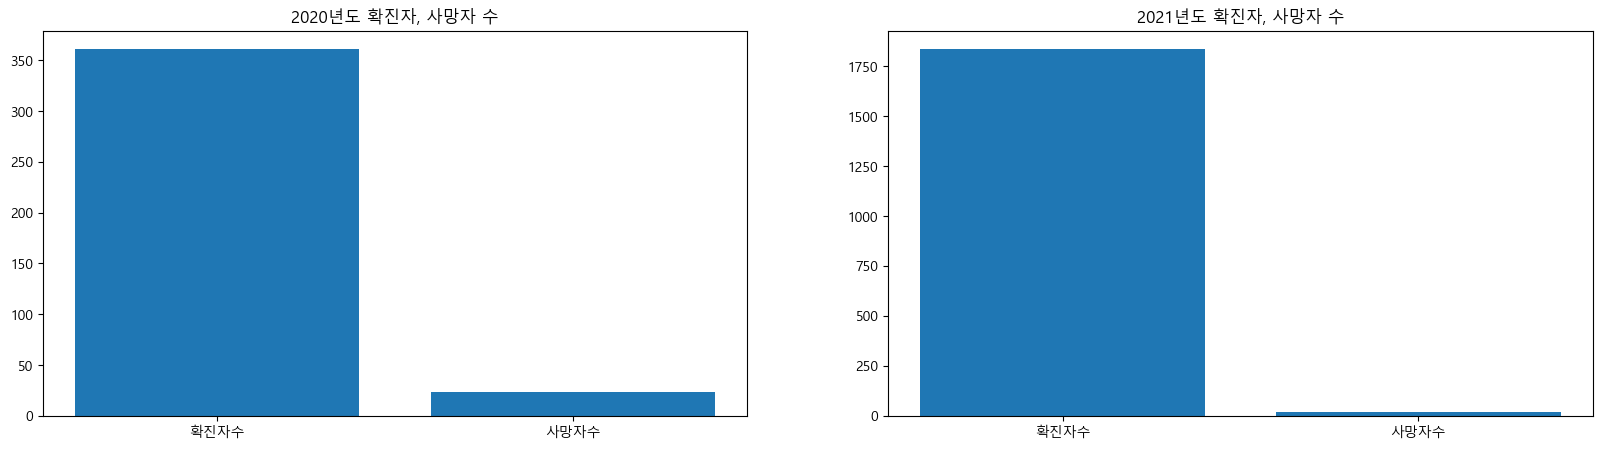

In [27]:
## 작업 8. 차트 작업

plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.title('2020년도 확진자, 사망자 수')
plt.bar(header[4:6], 세로합_2020년도)

plt.subplot(122)
plt.title('2021년도 확진자, 사망자 수')
plt.bar(header[4:6], 세로합_2021년도)

[8, 9, 1, 2, 18, 20, 2, 9, 292]
['2020-02', '2020-03', '2020-04', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12']


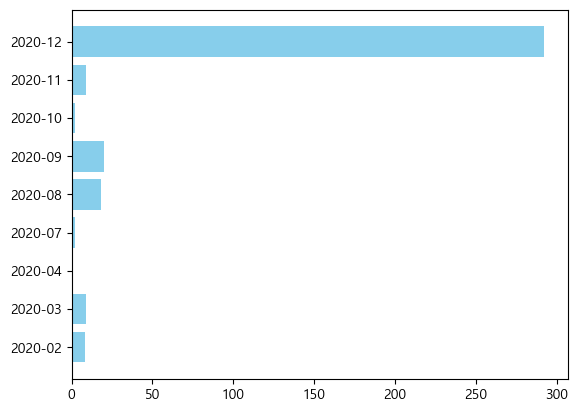

[28, 11, 18, 259, 255, 58, 121, 292, 316, 87, 91, 299]
['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']


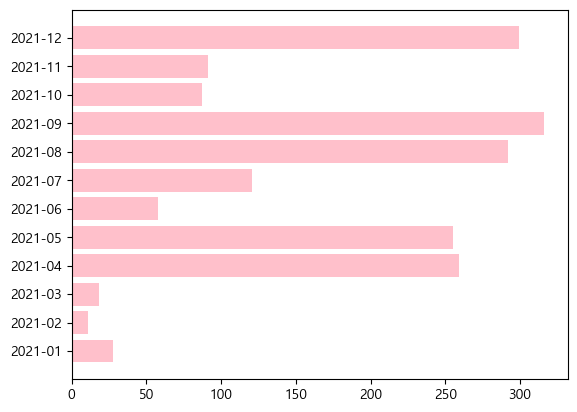

In [40]:
# plt.bar(레이블_2020년도, new_num[:9])
# 레이블_2020년도

# 2020년도 확진자 수만 분리

data_2020=[]
for x in new_num[:9]:
    data_2020.append(x[0])
print(data_2020)
print(label[:9])

plt.barh(label[:9], data_2020, color='skyblue')
plt.show()

# plt.bar(레이블_2021년도, new_num[:9])
# 레이블_2021년도

# 2021년도 확진자 수만 분리

data_2021=[]
for x in new_num[9:21]:
    data_2021.append(x[0])
print(data_2021)
print(label[9:21])

plt.barh(label[9:21], data_2021, color='pink')
plt.show()

